In [1]:

import numpy as np
from src.layers.denselayer import DenseLayer
from src.layers.convlayer import ConvLayer
from src.layers.flattenlayer import FlattenLayer
from src.layers.poollayer import MaxPoolLayer
from src.layers.relulayer import ReluLayer
from src.model import Model
from src.optimizers import gradient_descent
from src.utils import one_hot_enc
from src.utils import generate_batches

from tensorflow.keras.datasets import fashion_mnist

N_TRAIN_SAMPLES = 2000
N_TEST_SAMPLES = 400
N_CLASSES = 10

((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

X_train = trainX[:N_TRAIN_SAMPLES, :, :]
y_train = trainY[:N_TRAIN_SAMPLES]

X_test = trainX[N_TRAIN_SAMPLES:N_TRAIN_SAMPLES+N_TEST_SAMPLES, :, :]
y_test = trainY[N_TRAIN_SAMPLES:N_TRAIN_SAMPLES+N_TEST_SAMPLES]

X_train = X_train / 255
X_train = np.expand_dims(X_train, axis=3)
y_train = one_hot_enc(y_train)
X_test = X_test / 255
X_test = np.expand_dims(X_test, axis=3)
y_test = one_hot_enc(y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2000, 28, 28, 1) (2000, 10)
(400, 28, 28, 1) (400, 10)


In [2]:
layers = [
    ConvLayer(filters=16, kernel_shape=(3,3,1)),
    ReluLayer(),
    MaxPoolLayer(pool_size=(2,2), stride=2),
    ConvLayer(filters=32, kernel_shape=(5 ,5 ,16)),
    ReluLayer(),
    MaxPoolLayer(pool_size=(3,3), stride=3),
    FlattenLayer(),
    DenseLayer(nodes_prev=288, nodes_curr=10, activation="softmax")
]

model = Model(
    layers=layers, 
    optimizer=gradient_descent
)


In [3]:
hist = model.fit(X_train,y_train, epoch=10, lr=0.05, bs=5)

Iteration: 1	 cost: 0.61908	accuracy: 78.35%
Iteration: 2	 cost: 0.49816	accuracy: 82.60%
Iteration: 3	 cost: 0.44891	accuracy: 83.75%
Iteration: 4	 cost: 0.40476	accuracy: 85.90%
Iteration: 5	 cost: 0.37594	accuracy: 86.70%
Iteration: 6	 cost: 0.36066	accuracy: 86.65%
Iteration: 7	 cost: 0.31978	accuracy: 88.40%
Iteration: 8	 cost: 0.30365	accuracy: 89.10%
Iteration: 9	 cost: 0.25593	accuracy: 91.35%
Iteration: 10	 cost: 0.23904	accuracy: 92.40%


In [4]:
from src.metrics import accuracy_categ_ce
accuracy_categ_ce(y=y_test, y_hat=model.predict(X_test))

0.8025

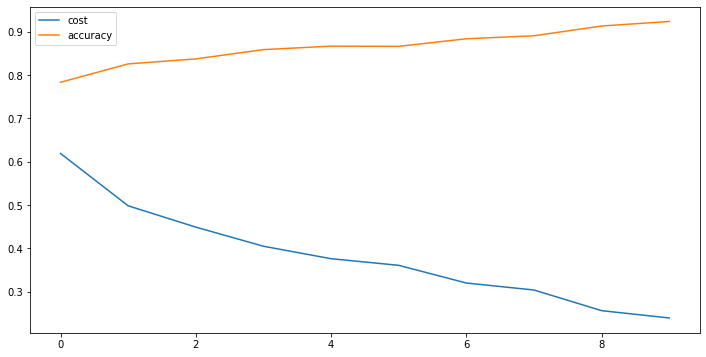

In [5]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,6))
plt.plot(hist)
plt.legend(['cost', 'accuracy'])
plt.show()
